## Modelling and Forecasting Brent Crude Oil with Random Forest Regressor


1. Importing Libraries: The first step is to import the necessary libraries. These libraries provide the tools and functions needed to perform the tasks in the code.

- `sklearn.model_selection.RandomizedSearchCV`:
  This is a function for performing randomized search on hyperparameters. It is used to find the best parameters for the model.
- `sklearn.metrics.mean_absolute_error`, `mean_absolute_percentage_error`, `mean_squared_error`:
  These are functions for calculating different types of error metrics between the actual and predicted values.
- `sklearn.ensemble.RandomForestRegressor`:
  This is the Random Forest regression model from the sklearn library.
- `numpy`:
  This is a library for numerical computations in Python.
- `plotly.graph_objects` and `plotly.express`:
  These are libraries for creating interactive plots.
- `pandas`: This is a library for data manipulation and analysis.


In [63]:
#%%

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import RandomizedSearchCV

2. **Loading Data**:
   The data is loaded from a CSV file into a pandas DataFrame.

- The `parse_dates=True` argument is used to automatically parse dates in the CSV file, and
- `index_col=[0]` sets the first (0th) column as the index of the DataFrame.


In [64]:
#%%

# Load data (assuming 'Modified_Data.csv' is in the same directory)
data = pd.read_csv("../Modified_Data.csv", parse_dates=True, index_col=[0])
data.head()

,Price
2002-01-01,19.96
2002-02-01,20.19
2002-03-01,24.03
2002-04-01,26.03
2002-05-01,25.69


Descriptive statistics and shape of the data shows the number of months and columns as (x,y)


In [65]:
# descriptive statistics of the data
data.describe().round(3)

,Price
count,252.000
mean,69.465
std,28.031
min,19.960
25%,48.472
50%,65.475
75%,91.955
max,134.790


In [66]:
data.shape

(252, 1)

3. **Visualize Data**: Plot the data with price on the y axis and dates on the x axis


In [67]:
# plot the data
px.line(data, x=data.index, y='Price', title='Prices of Brent Crude Oil from 2002 to 2022')


4. **Setting Train and Test Dates**:
   The start dates for the training and test datasets are defined.


In [68]:
#%%

# Define training and testing periods
train_start_date = "2002-01-01"
test_start_date = "2019-01-01"

# Split data into training and testing sets
# set the train and test data and print the dimensions of it
train = data.copy()[(data.index >= train_start_date) & (data.index < test_start_date)][['Price']]
test = data.copy()[data.index >= test_start_date][['Price']]

print('Training data shape: ', train.shape)
print('Test data shape: ', test.shape)

Training data shape:  (204, 1)
Test data shape:  (48, 1)


6. **Visualize Training and Testing Sets**: Plot the train and testing sets on a graph


In [69]:
#%%

# Plot train and test splits
fig = go.Figure()
fig.add_trace(go.Scatter(x=train.index, y=train['Price'], mode='lines', name='Train'))
fig.add_trace(go.Scatter(x=test.index, y=test['Price'], mode='lines', name='Test'))
fig.update_layout(title='Train and Test Split', xaxis_title='Date', yaxis_title='Price')
fig.show()

8. **Splitting Data into Features and Target**: The data is split into features (X) and target (y) for both the training and test datasets. The target is the `price` and the feature is the `date` or `index colomn`.


In [70]:
#%%

# Convert the data to numpy array
train_data = train.values
test_data = test.values

# split the data into X and y train and test splits
X_train, y_train = train_data[:-1], train_data[1:]
X_test, y_test = test_data[:-1], test_data[1:]

y_train = y_train.ravel()
y_test = y_test.ravel()

9. **Setting Up the Model**: A Random Forest Regressor model is set up and a RandomizedSearchCV is used to find the best parameters for the model.

**How the parameters in `param_dist_rf work`**

1. `n_estimators`: The number of trees in the forest. More trees reduce the variance of predictions, improving the model's performance. However, too many trees can slow down the model without providing much benefit.

2. `max_depth`: The maximum depth of the trees. Deeper trees can model more complex patterns, but they're also more likely to overfit to the training data.

3. `max_features`: The number of features to consider when looking for the best split. Considering more features at each split can increase the model's flexibility, but it can also slow down the training process.

4. `min_samples_split`: The minimum number of samples required to split an internal node. Larger values can help prevent overfitting, but if they're too large, the model might underfit.

5. `bootstrap`: Whether bootstrap samples are used when building trees. If False, the whole dataset is used to build each tree.


In [71]:

param_dist_rf = {"n_estimators": [450, 470, 490],
                 "max_depth": [1, 3, None],
                 "max_features": ['auto', 'sqrt'],
                 "min_samples_split": [2, 5, 10],
                 "bootstrap": [True, False]}

rf = RandomForestRegressor(random_state=42) # Instantiate the model
# set verbose to be 2 if you want to see full model fitting information
random_search_rf = RandomizedSearchCV(rf, param_distributions=param_dist_rf, cv=5, random_state=42)  # Instantiate the GridSearchCV with verbose and random_state parameters


# Create and fit RandomizedSearchCV (no TimeSeriesSplit)
random_search_rf.fit(X_train, y_train)

# Get the best model from RandomizedSearchCV
best_rf = random_search_rf.best_estimator_
best_rf.fit(X_train, y_train)

d:\DEV WORK\Data Science Library\ML-For-Beginners\.venv\lib\site-packages\sklearn\model_selection\_validation.py:542: FitFailedWarning:


20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "d:\DEV WORK\Data Science Library\ML-For-Beginners\.venv\lib\site-packages\sklearn\model_selection\_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\DEV WORK\Data Science Library\ML-For-Beginners\.venv\lib\site-packages\sklearn\base.py", line 1344, in wrapper
    estimator._validate_params()
  File "d:\DEV WORK\Data Science Library\ML-For-Beginners\.venv\lib\site-packages\sklearn\ba

RandomForestRegressor(max_features='sqrt', n_estimators=450, random_state=42)

Make predictions on test data


In [72]:
#%%

# Make predictions on test data
rf_predictions = best_rf.predict(X_test)

1. **Mean Square Error (MSE)**: It is the average of the squared differences between the predicted and actual values. It is a measure of the quality of an estimator—it is always non-negative, and values closer to zero are better.

    $$ \text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (Y_i - \hat{Y}_i)^2 $$

    where:
    - $n$ is the total number of observations,
    - $Y_i$ is the actual value, and
    - $\hat{Y}_i$ is the predicted value.

2. **Root Mean Squared Error (RMSE)**: It is the square root of the MSE. It measures the standard deviation of the residuals (prediction errors). Lower values of RMSE indicate better fit.

    $$ \text{RMSE} = \sqrt{\text{MSE}} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (Y_i - \hat{Y}_i)^2} $$

3. **Mean Absolute Error (MAE)**: It is the average of the absolute differences between the predicted and actual values. It measures the average magnitude of the errors in a set of predictions, without considering their direction.

    $$ \text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |Y_i - \hat{Y}_i| $$

4. **Mean Absolute Percentage Error (MAPE)**: It expresses accuracy as a percentage, and is defined by the formula:

    $$ \text{MAPE} = \frac{100}{n} \sum_{i=1}^{n} \left|\frac{Y_i - \hat{Y}_i}{Y_i}\right| $$

5. **Directional Accuracy**: It is the percentage of times the model predicts the correct direction of the price movement. It is calculated as:

    $$ \text{Directional Accuracy} = \frac{100}{n} \sum_{i=1}^{n} \mathbb{1}(\text{sign}(Y_{i+1} - Y_i) = \text{sign}(\hat{Y}_{i+1} - \hat{Y}_i)) $$

    where $\mathbb{1}(.)$ is the indicator function that equals 1 if the condition inside the brackets is true and 0 otherwise.


In [73]:
#%%

# Evaluate model performance
mse_rf = mean_squared_error(y_test, rf_predictions)
rmse_rf = np.sqrt(mse_rf)
mae_rf = mean_absolute_error(y_test, rf_predictions)
mape_rf = mean_absolute_percentage_error(y_test, rf_predictions) * 100
da_rf = np.mean(np.sign(y_test[1:] - y_test[:-1]) == np.sign(rf_predictions[1:] - rf_predictions[:-1])) * 100

print("Random Forest Evaluation:")
print(f"  - MSE: {mse_rf:.3f}")
print(f"  - RMSE: {rmse_rf:.3f}")
print(f"  - MAE: {mae_rf:.3f}")
print(f"  - MAPE: {mape_rf:.3f}%")
print(f"  - Directional Accuracy: {da_rf:.3f}%")

Random Forest Evaluation:
  - MSE: 48.268
  - RMSE: 6.948
  - MAE: 5.401
  - MAPE: 8.889%
  - Directional Accuracy: 60.870%


Visualization of Error metrics

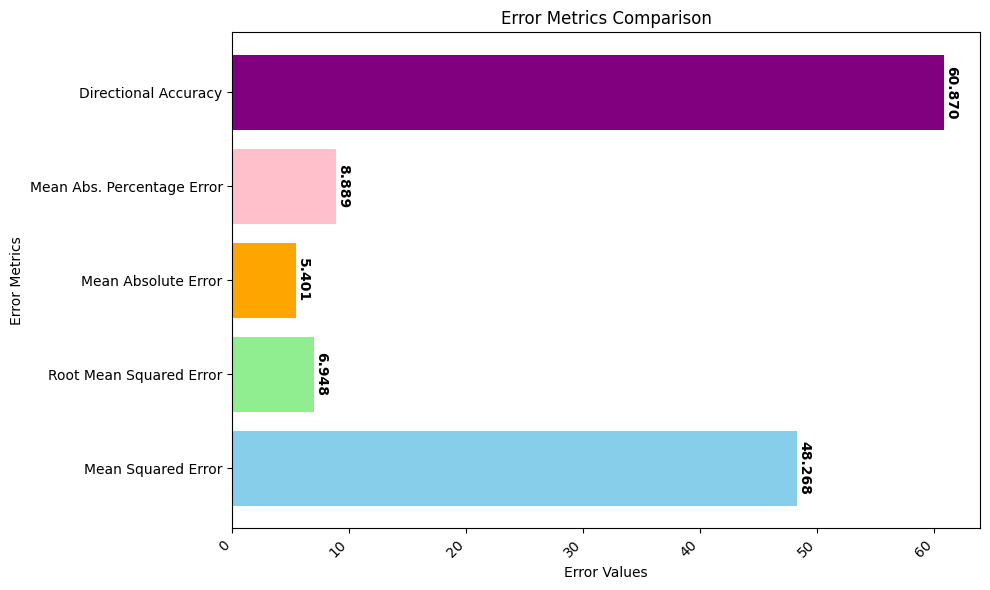

In [74]:
#%%

# Create a list of error metric names and values
metrics = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'Mean Abs. Percentage Error', 'Directional Accuracy']
values = [mse_rf, rmse_rf, mae_rf, mape_rf, da_rf]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.barh(metrics, values, color=['skyblue', 'lightgreen', 'orange', 'pink', 'purple'])
for i, v in enumerate(values):
    plt.text(v, i, f'{v:.3f}', color='black', va='center', rotation=270, fontweight='bold', fontsize=10)
plt.xlabel('Error Values')
plt.ylabel('Error Metrics')
plt.title('Error Metrics Comparison')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()

# Display the chart
plt.show()

13. **Visualizing the Results**: The actual and predicted prices are plotted over time.


In [75]:
#%%

# Plot the actual vs predicted prices with plotly
fig = go.Figure()
fig.add_trace(go.Scatter(x=test.index, y=test_data.flatten(), mode='lines', name='Actual'))
fig.add_trace(go.Scatter(x=test.index, y=rf_predictions, mode='lines', name='Predicted'))
fig.update_layout(title='Actual vs Predicted Prices - Random Forest',
                  xaxis_title='Date',
                  yaxis_title='Price')
fig.show()

14. **Forecasting Future Prices**: The model is used to forecast prices for the next 24 months. The forecasted prices are then plotted along with the historical data.


In [77]:
future_dates = pd.date_range(start=data.index[-1], periods=25, freq='M')[1:] # Start from the last date in the data and generate the next 24 months

# Make predictions on the future data
rf_forecast = best_rf.predict(test_data[-24:])

# Plot the historical data and the forecasted data for each model individually
fig_rf = go.Figure()
fig_rf.add_trace(go.Scatter(x=data.index, y=data['Price'], mode='lines', name='Historical Data'))
fig_rf.add_trace(go.Scatter(x=future_dates, y=rf_forecast, mode='lines', name='Forecasted Values'))
fig_rf.update_layout(title='Random Forest: Historical Data vs Forecasted Values')
fig_rf.show()